In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
customer_churn= pd.read_csv('customer_churn.csv')

In [56]:
customer_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
customer_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
customer_churn.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [64]:
pd.to_numeric(customer_churn.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [66]:
churn_df=customer_churn[customer_churn.TotalCharges!= " "]

In [68]:
churn_df.shape

(7032, 21)

In [70]:
churn_df.TotalCharges= pd.to_numeric(churn_df.TotalCharges)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/2274011529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.TotalCharges= pd.to_numeric(churn_df.TotalCharges)


In [72]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
churn_df.drop(columns='customerID', axis=1, inplace=True)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/2296385863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.drop(columns='customerID', axis=1, inplace=True)


In [76]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [78]:
def unique_val(df):
    for column in df.select_dtypes(include=['object']).columns:
        unique_values = df[column].unique()
        print(f'{column}: {unique_values}')


In [80]:
unique_val(churn_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [82]:
churn_df.replace('No internet service','No', inplace=True)
churn_df.replace('No phone service','No',inplace=True)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/2959645695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.replace('No internet service','No', inplace=True)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/2959645695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.replace('No phone service','No',inplace=True)


In [84]:
unique_val(churn_df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/2068210214.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=churn_df, palette=['green', 'red'])


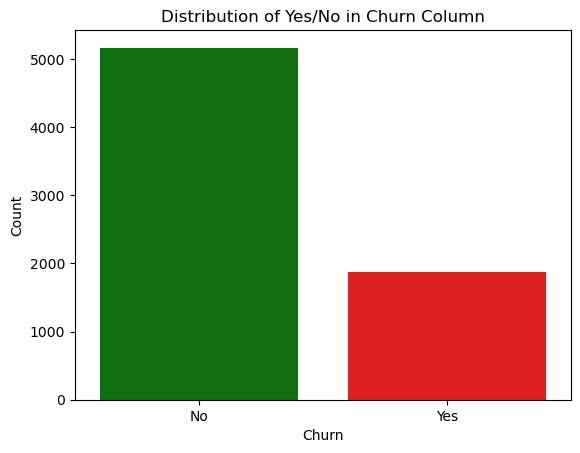

In [86]:
sns.countplot(x='Churn', data=churn_df, palette=['green', 'red'])
plt.title('Distribution of Yes/No in Churn Column')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [88]:
tenure_not_churned = churn_df.loc[churn_df['Churn'] == 'No', 'tenure']
tenure_churned = churn_df.loc[churn_df['Churn'] == 'Yes', 'tenure']


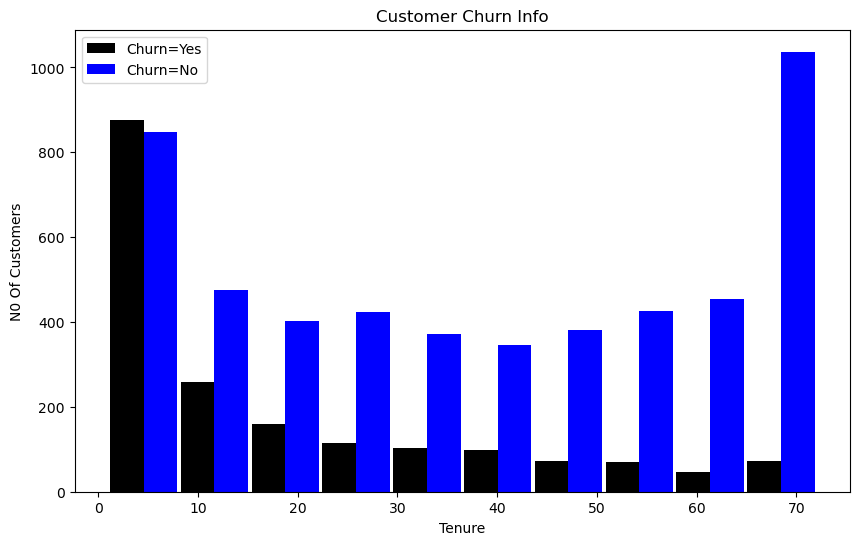

In [90]:
plt.figure(figsize=(10,6))
plt.xlabel("Tenure")
plt.ylabel("N0 Of Customers")
plt.title("Customer Churn Info")
plt.hist([tenure_churned, tenure_not_churned], rwidth=0.95, color=['black','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [92]:
monthly_charges_not_churned = churn_df.loc[churn_df['Churn'] == 'No', 'MonthlyCharges']
monthly_charges_churned = churn_df.loc[churn_df['Churn'] == 'Yes', 'MonthlyCharges']


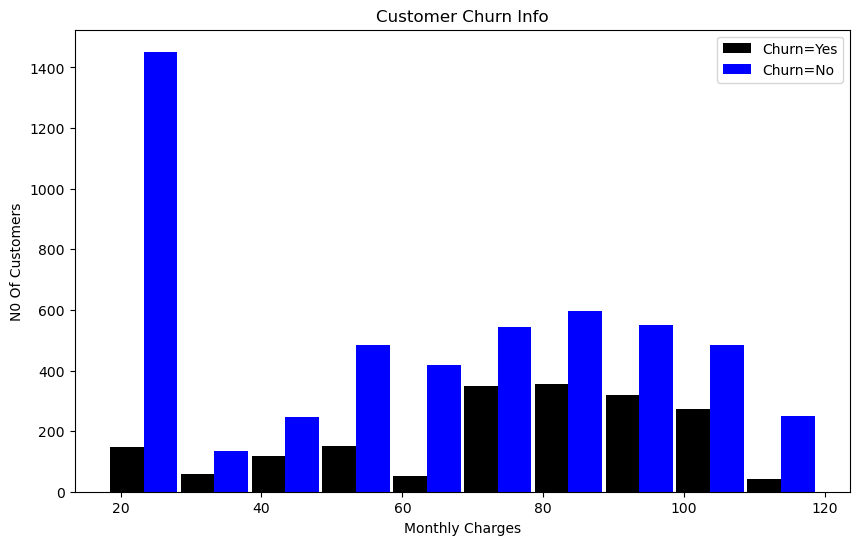

In [94]:
plt.figure(figsize=(10,6))
plt.xlabel("Monthly Charges")
plt.ylabel("N0 Of Customers")
plt.title("Customer Churn Info")
plt.hist([monthly_charges_churned, monthly_charges_not_churned], rwidth=0.95, color=['black','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [96]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
map_to_binary= {'Yes':1,'No':0}


In [102]:
columns_to_convert=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV','PaperlessBilling','Churn']

In [104]:
churn_df[columns_to_convert] = churn_df[columns_to_convert].replace(map_to_binary)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/2326564148.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_df[columns_to_convert] = churn_df[columns_to_convert].replace(map_to_binary)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/2326564148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df[columns_to_convert] = churn_df[columns_to_convert].replace(map_to_binary)


In [106]:
unique_val(churn_df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [108]:
gender_to_binary= {'Female':0,'Male':1}

In [112]:
churn_df.gender = churn_df.gender.replace(gender_to_binary)

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/508525467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_df.gender = churn_df.gender.replace(gender_to_binary)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_21135/508525467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.gender = churn_df.gender.replace(gender_to_binary)


In [114]:
unique_val(churn_df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [116]:
churn_df.head

In [120]:
df= pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [122]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,1,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True
7042,1,0,0,0,66,1,0,1,0,1,...,False,True,False,False,False,True,True,False,False,False


In [130]:
df = df.astype(int)


In [132]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   7032 non-null   int64
 1   SeniorCitizen                            7032 non-null   int64
 2   Partner                                  7032 non-null   int64
 3   Dependents                               7032 non-null   int64
 4   tenure                                   7032 non-null   int64
 5   PhoneService                             7032 non-null   int64
 6   MultipleLines                            7032 non-null   int64
 7   OnlineSecurity                           7032 non-null   int64
 8   OnlineBackup                             7032 non-null   int64
 9   DeviceProtection                         7032 non-null   int64
 10  TechSupport                              7032 non-null   int64
 11  Streaming

In [136]:
df = df.drop(columns=['InternetService_No', 'Contract_Two year', 'PaymentMethod_Mailed check'])


In [146]:
features_normalize= ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
df[features_normalize]= scale.fit_transform(df[features_normalize])

In [155]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
1772,1,0,0,0,0.014085,1,0,0,0,0,...,0.61,0.014424,1,0,1,1,0,0,0,1
2532,0,1,0,0,0.563380,1,0,0,0,1,...,0.83,0.461343,0,0,1,0,1,1,0,0
3480,1,0,1,0,0.971831,1,0,0,0,0,...,0.01,0.163282,0,0,0,0,0,0,1,0
4205,0,0,1,1,0.323944,1,1,1,0,1,...,0.60,0.210939,0,1,0,0,0,0,1,0
3269,1,0,0,0,0.901408,1,1,0,0,0,...,0.06,0.182553,0,0,0,0,1,0,1,0
3260,1,0,0,0,0.422535,1,0,0,1,0,...,0.60,0.278906,1,0,1,1,0,0,0,1
4560,1,0,1,1,0.112676,1,1,0,0,1,...,0.72,0.086430,0,0,1,0,1,0,0,1
6683,1,0,0,0,0.591549,0,0,0,0,1,...,0.26,0.220748,0,1,0,0,1,0,0,1
5087,0,0,1,0,0.014085,1,0,0,0,0,...,0.02,0.002654,0,0,0,1,0,0,0,0
5470,0,1,1,0,0.985915,1,0,0,1,1,...,0.71,0.740480,0,0,1,0,0,0,1,0


In [159]:
independent_data= df.drop('Churn',axis=1)
dependent_data= df['Churn']

In [161]:
X= independent_data.copy()
y= dependent_data.copy()

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [165]:
X_train.shape

(4922, 23)

In [171]:
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.3993 - loss: 0.8401 
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.7550 - loss: 0.5078
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.7910 - loss: 0.4496
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.8032 - loss: 0.4304
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step - accuracy: 0.7962 - loss: 0.4307
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 0.8105 - loss: 0.4140
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.8041 - loss: 0.4133
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.8045 - loss: 0.4160
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.8096 - loss: 0.4085
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.8085 - loss: 0.4126
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.8161 - loss: 0.4039
Epoch 12/100
154/154 ━━━━━━━━━

In [173]:
y_predicted= model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


In [175]:
y_predicted

array([[0.02897929],
       [0.02073344],
       [0.01821786],
       ...,
       [0.05848674],
       [0.03523199],
       [0.7576153 ]], dtype=float32)

In [177]:
y_pred = (y_predicted > 0.5).astype(int)  


In [179]:
score = model.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.7854 - loss: 0.4528
Test Loss: 0.45528939366340637
Test Accuracy: 0.777725100517273


In [181]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1541
           1       0.64      0.40      0.49       569

    accuracy                           0.78      2110
   macro avg       0.72      0.66      0.67      2110
weighted avg       0.76      0.78      0.76      2110



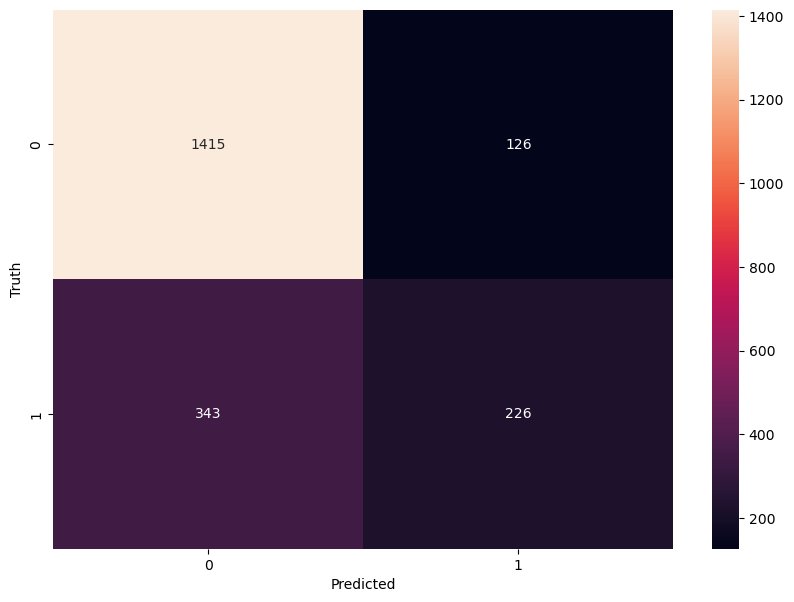

In [183]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()